In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fft as spfft

In [3]:
def fft(samples, fs, N=None, ax=None, plot=True):
    if N == None:
        N = len(samples)
    
    samps_fft = (1/N)*spfft.fft(samples, n=N)
    freqs = spfft.fftshift(spfft.fftfreq(N, d=1/fs)) #shift for zero frequency in center
    samps_fft = spfft.fftshift(samps_fft)
    samps_fft_mag = np.absolute(samps_fft)
       
    ##Apply fft magnitude scaling##
    #samps_fft_mag *= (2/N)
    #samps_fft_mag[np.where(freqs == 0)] /= 2
    
    fft_dict = {'fft': samps_fft, 'fft_mags': samps_fft_mag,
                'freqs': freqs}
    
    if ax is None and plot:
        fft_fig, ax = plt.subplots(figsize=(10,5))
    
    if plot:
        ax.plot(fft_dict['freqs'], fft_dict['fft_mags'])
        ax.set_title('Sample FFT')
        ax.set_xlabel('Frequency (Hz.)')
        ax.set_ylabel('|X(f)|')

    return fft_dict

In [4]:
def fft_rms_power_calc(fft_mags, fft_freqs, int_t=None):
        
    if int_t is not None:
        #Frequency response of moving average filter applied from integration
        Hma = np.abs(np.sinc(fft_freqs*int_t))
        #Apply filtering in fourier space
        fft_mags = np.multiply(Hma, fft_mags)
    
    return np.sqrt(np.sum(fft_mags**2)) 

In [9]:
fs = 500
t = np.arange(-20000,20000, 1/fs)
f = 10
test_sig = 4 + 20*np.sin(2*np.pi*f*t)

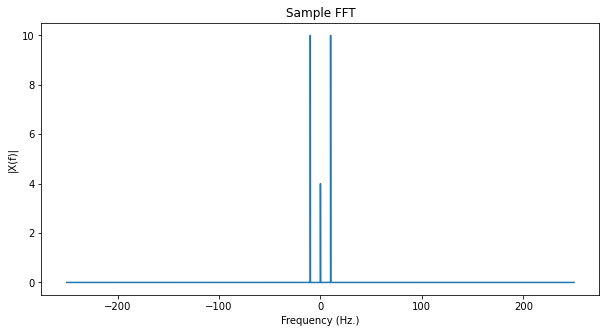

In [10]:
ts_fft = fft(test_sig, fs)

In [11]:
fft_rms_power_calc(ts_fft['fft_mags'], ts_fft['freqs'], 1000)

3.9999999997450364

In [8]:
#root mean square
np.sqrt((test_sig**2).mean())

14.696938456715639

In [12]:
int_t = 100

#Generate moving average filter corresponding to given integration time and perform filtering in time
ma_N = int(int_t*fs)
ma_filter = (1/ma_N)*np.ones(ma_N)
#ma_filter_fft = fft(ma_filter, fs, N=ws_len, plot=False)
ts_integrated = np.convolve(ma_filter, test_sig)
ts_power_fft = fft_rms_power_calc(ts_fft['fft_mags'], ts_fft['freqs'], int_t=int_t)

print(np.sqrt((ts_integrated**2).mean()))
print(ts_power_fft)

2.9814356336617625
4.00000000000293
